In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

if (os.path.basename(os.getcwd()) == 'Notebooks'):
    os.chdir('..')

from models.rfclassifier import RfClassifier
from wettbewerb import load_references
import shap
from preprocessing.preprocessing import *
from utils.utils import *
from config import *

c:\Users\Isabe\.julia\conda\3\envs\kismed\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Explainable AI Side Quest

This notebook explains how to get an explainable model and explainable predictions.
Only the RfClassifier model (which is used for the binary class problem (atrial fibrillation detection)) can return explainable predictions..

In [3]:
model = RfClassifier()

In [4]:
ecg_leads, ecg_labels, fs, ecg_names = get_all_data()

train_data, train_labels, val_data, val_labels, test_data, test_labels = preprocess(ecg_leads, ecg_labels,
                                                                                    typ=ProblemType.BINARY,
                                                                                    val_data=False)

6000	 Dateien wurden geladen.
8528	 Dateien wurden geladen.
6877	 Dateien wurden geladen.
10646	 Dateien wurden geladen.


To be able to explain predictions, the model (and its explanation model) needs to trained.

In [5]:
# model.train(train_data, train_labels, val_data, val_labels, 300,  ProblemType.BINARY)

### Explainable predictions
With .explain_prediction(signal), we can then get an analysis for which features were the most important when deciding if a signal is a normal signal or an atrial fibrillation signal.
Pay attention that the method can only work with single signals.


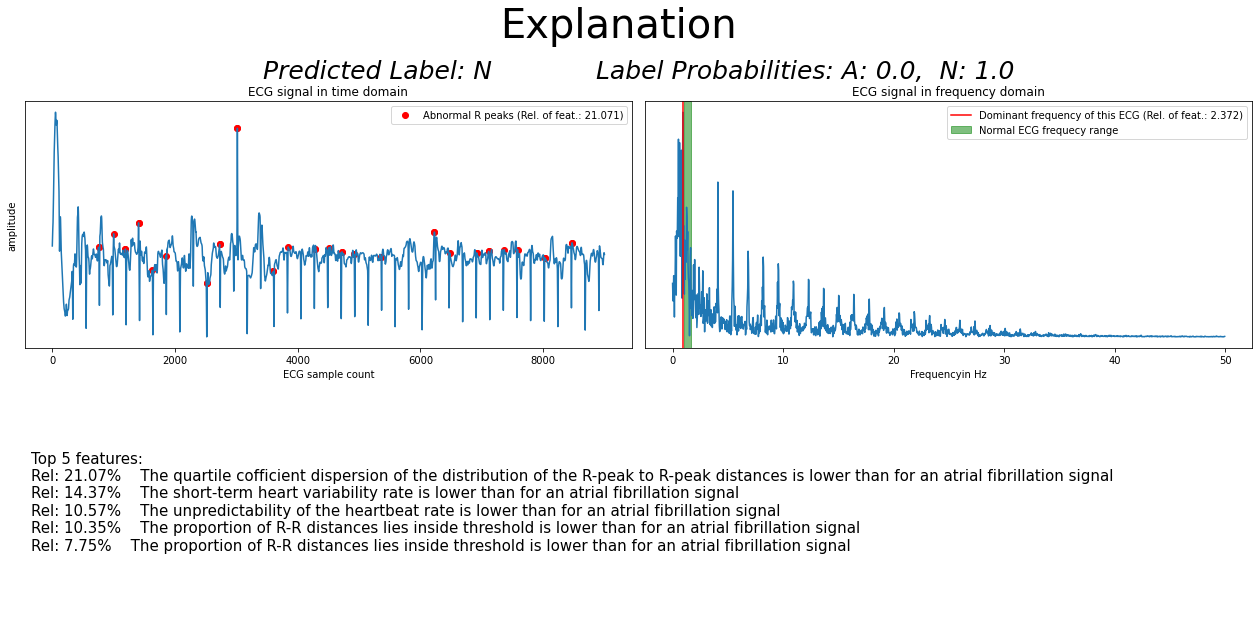

In [8]:
most_important_feats, importance, shap_vals = model.explain_prediction(test_data[7])